In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Average Per-Class Metrics Across 5 Folds:

Class: Blade
  Precision: 0.500
  Recall: 0.047
  F1-score: 0.086

Class: Gun
  Precision: 0.855
  Recall: 0.992
  F1-score: 0.919

Class: Other
  Precision: 0.667
  Recall: 0.214
  F1-score: 0.324


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


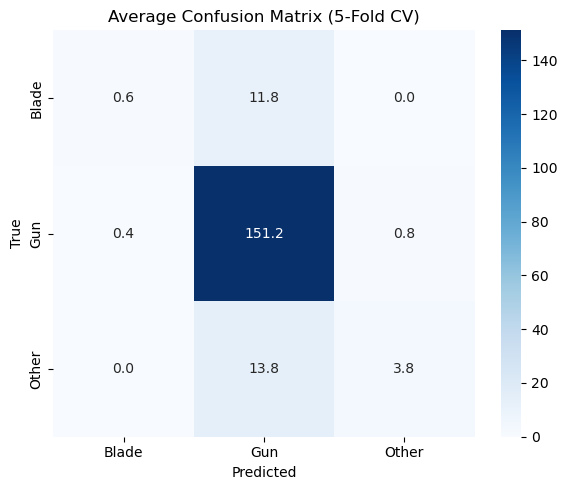

In [2]:


# Loads cleaned dataset
df = pd.read_csv('../data/homicide_cleaned.csv', parse_dates=['Incident_Date'])
df = df.dropna(subset=['Latitude','Longitude','Weapon'])

# Split into Features (X) and Labels (y)
X = df.drop(["Weapon_Simplified", "Incident_Date", "Weapon", "Gender", "Race", "Hour", "NPA"], axis=1)
y = df["Weapon_Simplified"]

# Initialize StratifiedKFold and model
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Storage for metrics and confusion matrices
reports = []
conf_matrices = []

#Runs cross-validation
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save metrics and confusion matrix
    reports.append(classification_report(y_test, y_pred, output_dict=True))
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=model.classes_))

# Average classification report
avg_metrics = {}
for label in model.classes_:
    avg_metrics[label] = {
        metric: np.mean([r[label][metric] for r in reports])
        for metric in ['precision', 'recall', 'f1-score']
    }

print("Average Per-Class Metrics Across 5 Folds:")
for label, metrics in avg_metrics.items():
    print(f"\nClass: {label}")
    for metric, score in metrics.items():
        print(f"  {metric.capitalize()}: {score:.3f}")

# Plot average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

plt.figure(figsize=(6, 5))
sns.heatmap(avg_conf_matrix, annot=True, fmt=".1f",
            xticklabels=model.classes_, yticklabels=model.classes_,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Average Confusion Matrix (5-Fold CV)")
plt.tight_layout()
plt.show()


In [3]:
from joblib import dump

final_model = RandomForestClassifier(random_state=42, class_weight='balanced')
final_model.fit(X, y)
dump(final_model, '../models/model_09v4.pkl')
print('model_09v4.pkl saved')

model_09v4.pkl saved
